In [1]:
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
from sklearn.compose import TransformedTargetRegressor
from scipy.spatial import distance
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance
import datetime as dt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

<h3> Import Datasets </h3>

In [22]:
# Import input datasets
files_NY = pd.read_csv(r'C:\Users\dshru\Desktop\MDS\NY\listings (1).csv')
files_SF = pd.read_csv(r'C:\Users\dshru\Desktop\MDS\SF\listings (2).csv')
files_starbucks = pd.read_csv(r'C:\Users\dshru\Desktop\MDS\starbucks_loc\starbucks_us_locations.csv')

In [25]:
plot_NY = files_NY.copy()
plot_SF = files_SF.copy()

<h3> Clean Datasets </h3>

In [46]:
# Drop Data that is not relevant ( New Yprk)
files_NY.drop(['id','name','host_id','host_name','last_review','reviews_per_month'],axis = 1, inplace = True)
files_NY.dropna(axis = 0, inplace = True)
files_NY[['neighbourhood_group','neighbourhood','room_type']] = files_NY[['neighbourhood_group','neighbourhood','room_type']].astype('string')
files_NY[['neighbourhood_group','neighbourhood','room_type']] = files_NY[['neighbourhood_group','neighbourhood','room_type']].apply(LabelEncoder().fit_transform)
files_NY['price_log'] = np.log(files_NY['price']+1)


# Drop Data that is not relevant( LA)
files_SF.drop(['id','name','host_id','host_name','last_review','reviews_per_month'],axis = 1, inplace = True)
files_SF.dropna(axis = 0, inplace = True)
files_SF[['neighbourhood_group','neighbourhood','room_type']] = files_SF[['neighbourhood_group','neighbourhood','room_type']].astype('string')
files_SF[['neighbourhood_group','neighbourhood','room_type']] = files_SF[['neighbourhood_group','neighbourhood','room_type']].apply(LabelEncoder().fit_transform)
files_SF['price_log'] = np.log(files_SF['price']+1)

<h3> Normalize Data </h3>

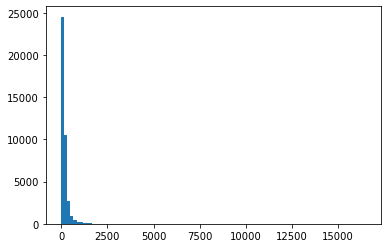

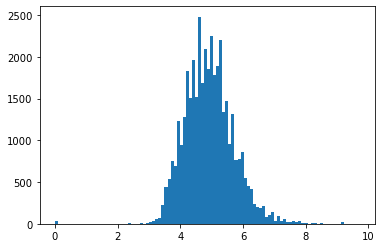

In [7]:
# as data is left skewed, we need to convert it to normally distributed
plt.hist(files_NY['price'], bins = 100)
plt.show()

# convert price into normal distribution as it is not originally normally distributed
plt.hist(files_NY['price_log'],bins = 100)
plt.show()

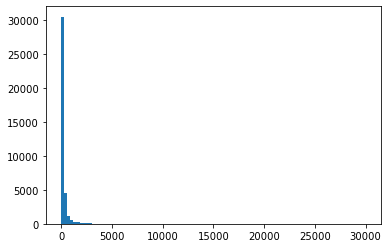

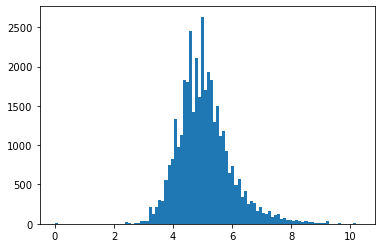

In [8]:
# as data is left skewed, we need to convert it to normally distributed
plt.hist(files_SF['price'], bins = 100)
plt.show()

# convert price into normal distribution as it is not originally normally distributed
plt.hist(files_SF['price_log'],bins = 100)
plt.show()

<AxesSubplot:>

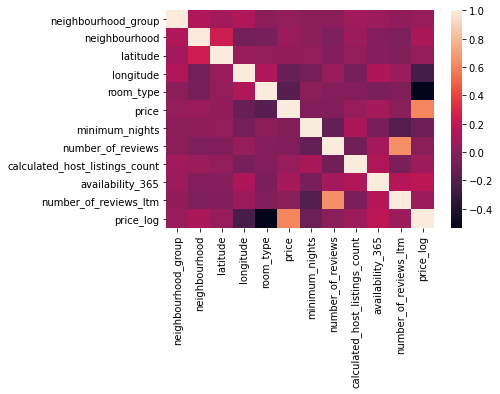

In [9]:
# Find input features which are least correlated for New YORK
correl = files_NY.corr()
sns.heatmap( correl)

<AxesSubplot:>

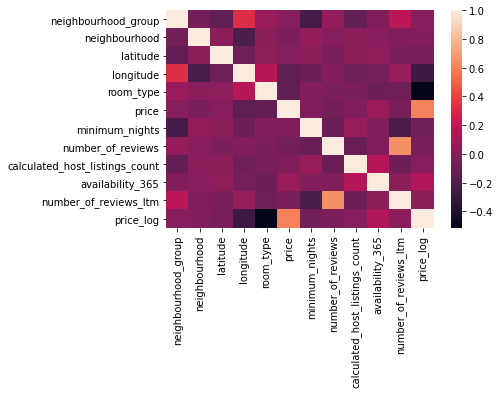

In [10]:
# Find input features which are least correlated for LA
corr = files_SF.corr()
sns.heatmap( corr)

<h3> Fitting Random Forest Regressor(New York) </h3>

Random Forest Regressor Score 0.6094375223297641


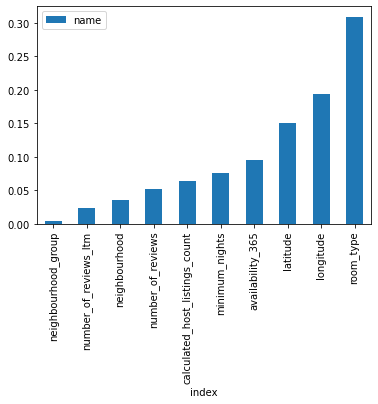

In [13]:
# New York Model Analysis
X = files_NY.drop(['price','price_log'], axis = 1)
y = files_NY['price_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

wrapped_model = TransformedTargetRegressor(regressor=RandomForestRegressor(), transformer=MinMaxScaler())

wrapped_model.fit(X_train, y_train)
yhat = wrapped_model.predict(X_test)
feat_importances = pd.Series(wrapped_model.regressor_.feature_importances_, index=X.columns)
print("Random Forest Regressor Score", wrapped_model.score(X_test, y_test))
feat_imp = pd.DataFrame(feat_importances, columns = ['name']).reset_index()
feat_imp = feat_imp.sort_values('name')
feat_imp.plot.bar(x='index', y='name')
plt.show()

<h3> Random Forest Regressor (LA) </h3>

The Score is  0.6111570051839788


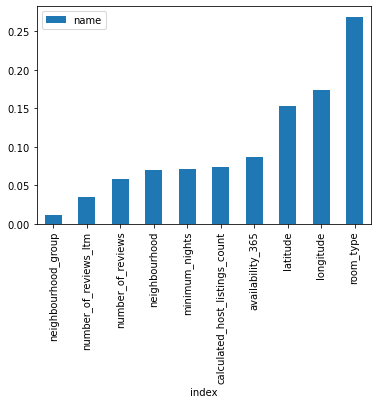

In [14]:
# SF Model analysis
X = files_SF.drop(['price','price_log'], axis = 1)
y = files_SF['price_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

wrapped_model = TransformedTargetRegressor(regressor=RandomForestRegressor(), transformer=MinMaxScaler())
wrapped_model.fit(X_train, y_train)
yhat = wrapped_model.predict(X_test)
feat_importances = pd.Series(wrapped_model.regressor_.feature_importances_, index=X.columns)
print("The Score is ", wrapped_model.score(X_test, y_test))

feat_imp = pd.DataFrame(feat_importances, columns = ['name']).reset_index()
feat_imp = feat_imp.sort_values('name')
feat_imp.plot.bar(x='index', y='name')
plt.show()


<h3> XGBOOST (New York)</h3>

In [15]:
X = files_NY.drop(['price','price_log'], axis = 1)
y = files_NY['price_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Running model a XGB Regressor
model = xgb.XGBRegressor()

# Fit the model on training data
model.fit(X_train, y_train)

# Predict
pred_train = model.predict(X_train)

# Validate
pred_val = model.predict(X_test)

#R2 score
r2 = r2_score(y_test, pred_val)
r2

np.mean((pred_val - y_test)**2)

0.2455625936064383

<h3> XGBOOST( Los Angeles) </h3> 

In [16]:
X = files_SF.drop(['price','price_log'], axis = 1)
y = files_SF['price_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Running model a XGB Regressor
model = xgb.XGBRegressor()

# Fit the model on training data
model.fit(X_train, y_train)

# Predict
pred_train = model.predict(X_train)

# Validate
pred_val = model.predict(X_test)

#R2 score
r2 = r2_score(y_test, pred_val)
r2

np.mean((pred_val - y_test)**2)

0.32353348934695453

We tried to predict the Price based on input features, and based on feature importance, the top 5 
features are, room type, latitude, longitude, availability and host listings count

We fitted SVR, Random Forest Regressor and XG Boost, and out of all of these random forest gave the highest accuracy 
of 60% for both New yok and Los angeles data

As we also see the Top features for the model are different
For NY the top 5 features are : room type, latitude, longitude, availability and minimum nights
For LA the top 5 features are : room type, latitude, longitude, availability and host listings count

<h3> EDA( New York Data) </h3>

<AxesSubplot:xlabel='room_type'>

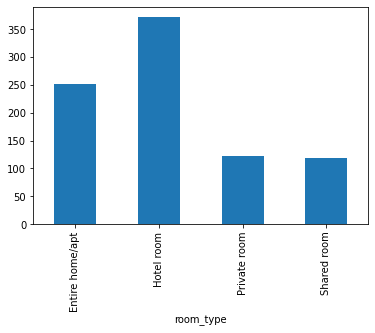

In [26]:
plot_NY.groupby('room_type')['price'].mean().plot.bar()

<AxesSubplot:xlabel='availability_365'>

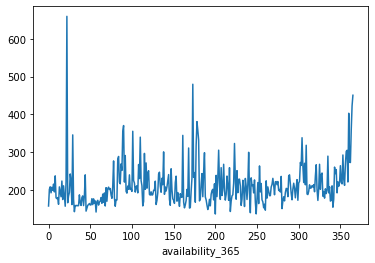

In [27]:
plot_NY.groupby('availability_365')['price'].mean().plot.line()

<AxesSubplot:xlabel='minimum_nights'>

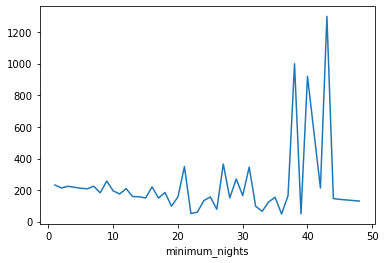

In [29]:
plot_NY.loc[plot_NY['minimum_nights']<50].groupby('minimum_nights')['price'].mean().plot.line()

<h3> EDA ( Los Angeles) </h3>

<AxesSubplot:xlabel='room_type'>

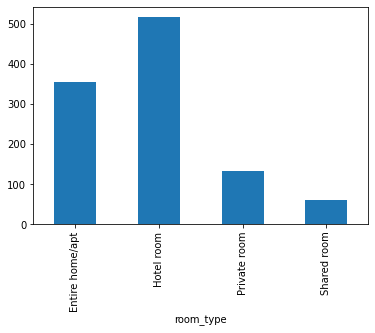

In [32]:
plot_SF.groupby('room_type')['price'].mean().plot.bar()

<AxesSubplot:xlabel='availability_365'>

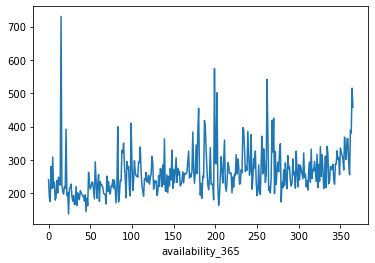

In [33]:
plot_SF.groupby('availability_365')['price'].mean().plot.line()

In [37]:
plot_SF.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

<AxesSubplot:xlabel='minimum_nights'>

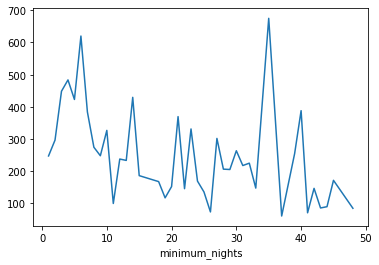

In [40]:
plot_SF.loc[plot_SF['minimum_nights'] < 50].groupby('minimum_nights')['price'].mean().plot.line()

<h3> Clean Starbucks Data </h3

In [85]:
fil_star = files_starbucks.dropna( axis = 0)
def Closest_Dist(df1, df2, cols =['latitude','longitude']):
    return distance.cdist(df1[cols],df2[cols]).min(axis=1)

In [86]:
a = Closest_Dist(files_NY, fil_star)
b = Closest_Dist(files_SF, fil_star)

In [87]:
starbucks_NY = files_NY
starbucks_NY['closest_distance'] = a

In [88]:
starbucks_LA = files_SF
starbucks_LA['closest_distance'] = b

<h3> Random Forest with nearest starbucks location( New York) </h3>

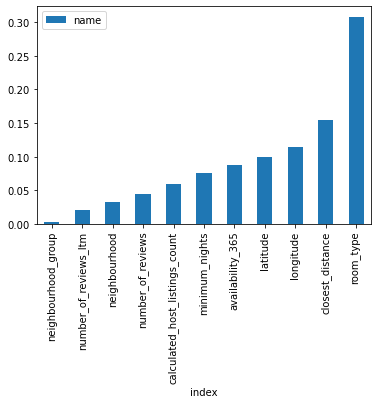

0.5999569881424103


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_log', ylabel='Density'>

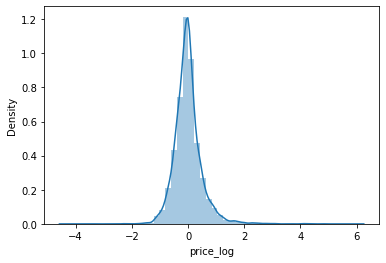

In [49]:
X = starbucks_NY.drop(['price','price_log'], axis = 1)
y = starbucks_NY['price_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

wrapped_model = TransformedTargetRegressor(regressor=RandomForestRegressor(), transformer=MinMaxScaler())

wrapped_model.fit(X_train, y_train)
yhat = wrapped_model.predict(X_test)
feat_importances = pd.Series(wrapped_model.regressor_.feature_importances_, index=X.columns)
feat_imp = pd.DataFrame(feat_importances, columns = ['name']).reset_index()
feat_imp = feat_imp.sort_values('name')
feat_imp.plot.bar(x='index', y='name')
plt.show()
print(wrapped_model.score(X_test, y_test))
sns.distplot((y_test-yhat),bins=50)

<h3> Random Forest with nearest starbucks location(Los Angeles) </h3>

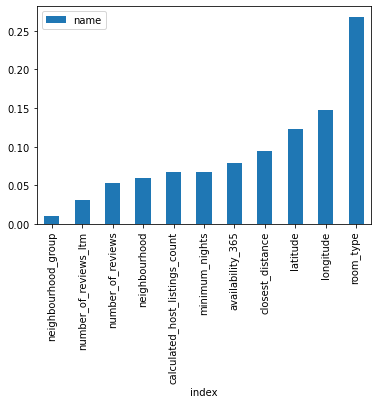

0.6171787378239697


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_log', ylabel='Density'>

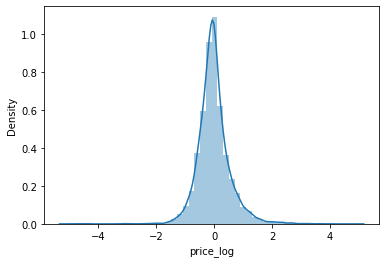

In [50]:
X = starbucks_LA.drop(['price','price_log'], axis = 1)
y = starbucks_LA['price_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

wrapped_model = TransformedTargetRegressor(regressor=RandomForestRegressor(), transformer=MinMaxScaler())

wrapped_model.fit(X_train, y_train)
yhat = wrapped_model.predict(X_test)
feat_importances = pd.Series(wrapped_model.regressor_.feature_importances_, index=X.columns)
feat_imp = pd.DataFrame(feat_importances, columns = ['name']).reset_index()
feat_imp = feat_imp.sort_values('name')
feat_imp.plot.bar(x='index', y='name')
plt.show()
print(wrapped_model.score(X_test, y_test))
sns.distplot((y_test-yhat),bins=50)

<h3> Plot Price with distance from starbucks </h3>

<Figure size 1440x1440 with 0 Axes>

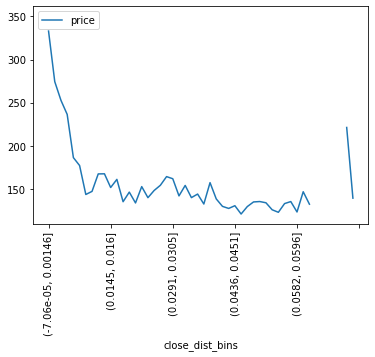

In [82]:
fig = plt.figure(figsize = (20,20))
starbucks_NY['close_dist_bins'] = pd.cut(starbucks_NY['closest_distance'], 50)
starbucks_NY.groupby('close_dist_bins').agg({'price':np.mean}).plot.line()
plt.xticks(rotation = 90)
plt.show()

<Figure size 1440x1440 with 0 Axes>

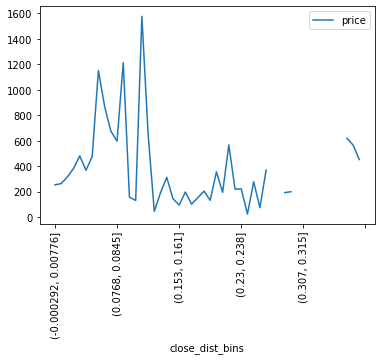

In [90]:
fig = plt.figure(figsize = (20,20))
starbucks_LA['close_dist_bins'] = pd.cut(starbucks_LA['closest_distance'], 50)
starbucks_LA.groupby('close_dist_bins').agg({'price':np.mean}).plot.line()
plt.xticks(rotation = 90)
plt.show()